In [105]:
import multiresolutionimageinterface as mir
import matplotlib.pyplot as plt
import numpy as np

In [124]:
reader = mir.MultiResolutionImageReader()
mr_image = reader.open('../inputs/tumor_001.tif')
level = 2
ds = mr_image.getLevelDownsample(level)

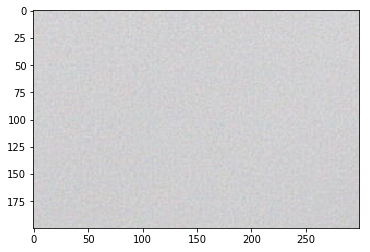

In [69]:
level = 0
ds = mr_image.getLevelDownsample(level)
image_patch = mr_image.getUCharPatch(int(20 * ds), int(500 * ds), 300, 200, level)
plt.imshow(image_patch)

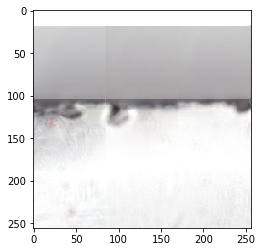

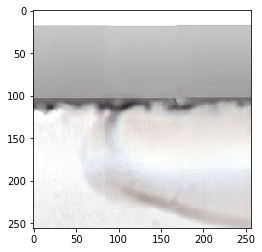

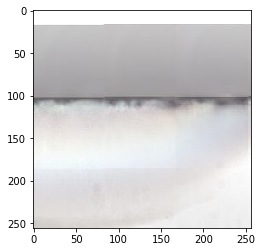

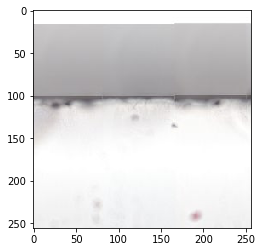

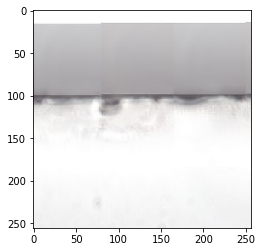

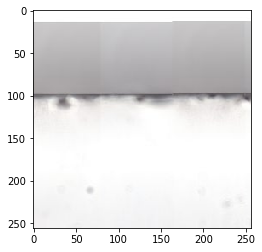

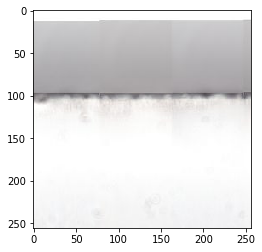

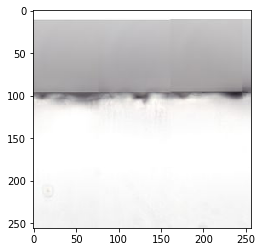

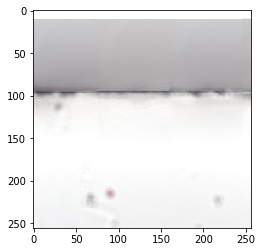

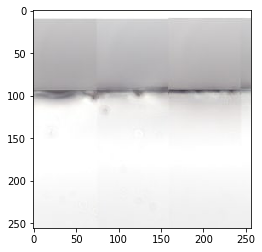

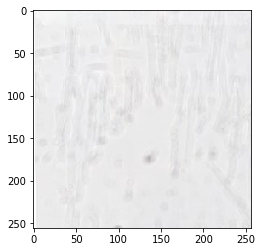

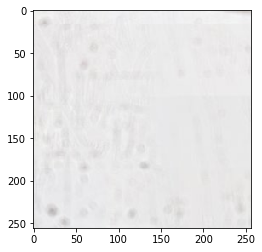

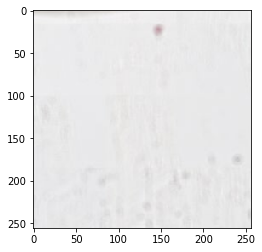

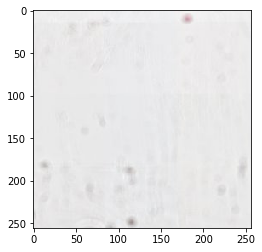

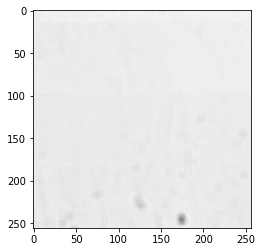

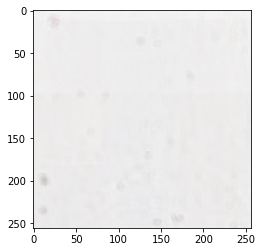

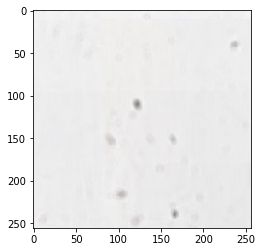

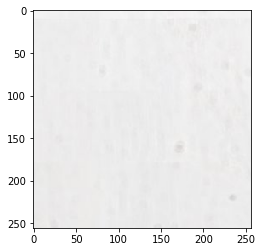

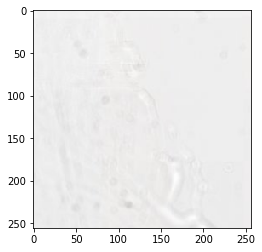

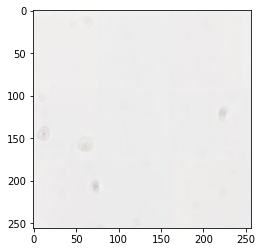

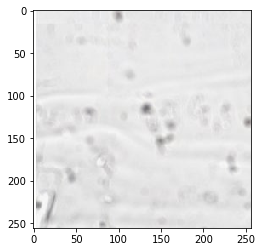

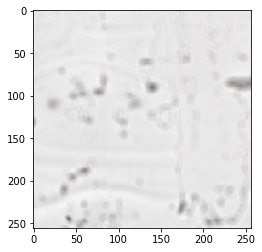

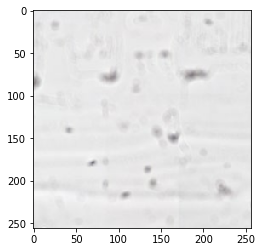

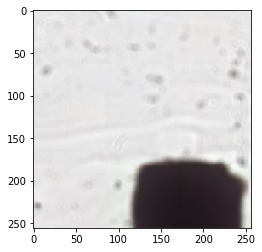

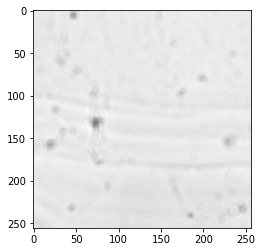

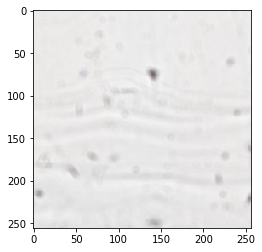

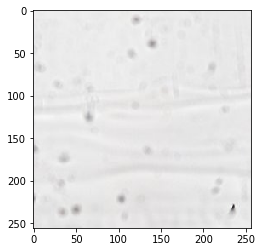

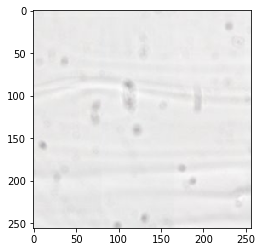

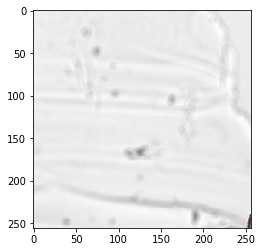

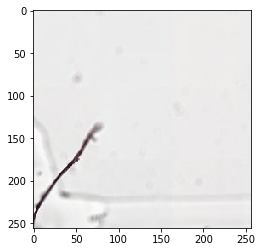

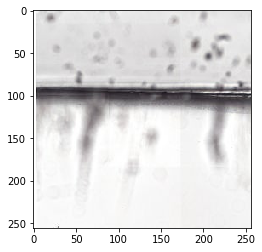

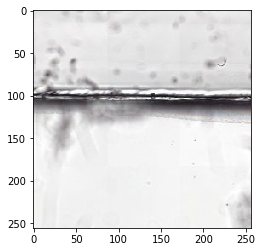

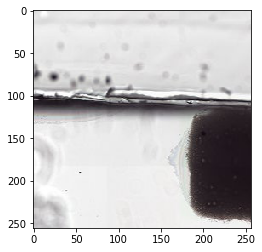

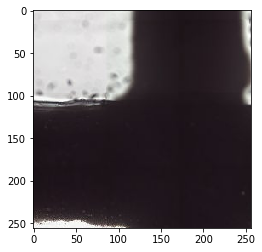

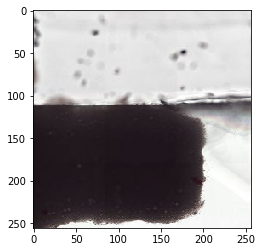

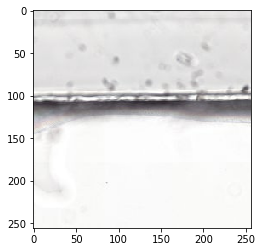

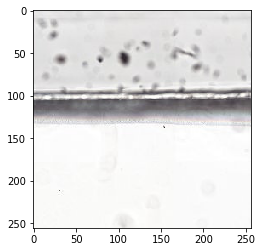

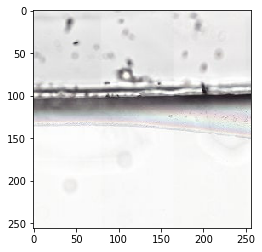

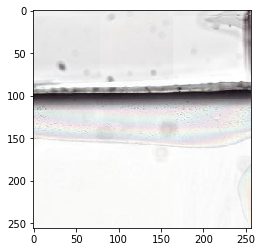

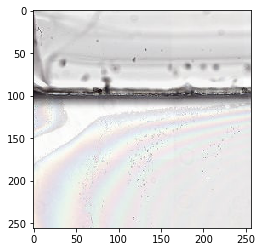

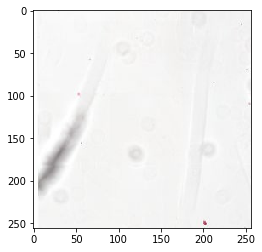

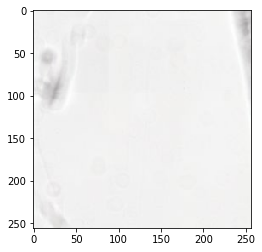

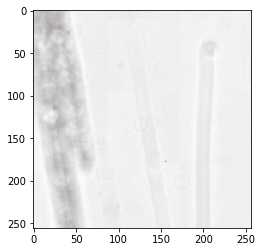

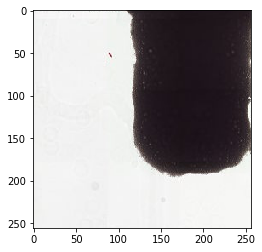

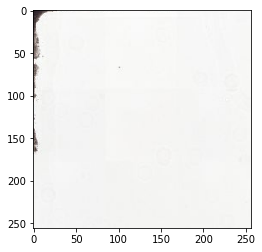

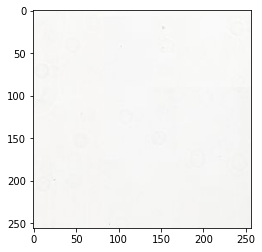

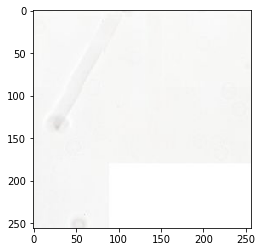

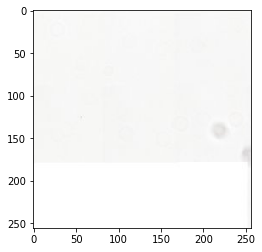

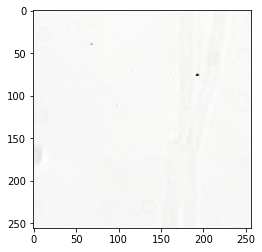

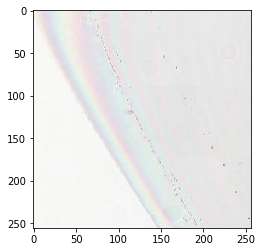

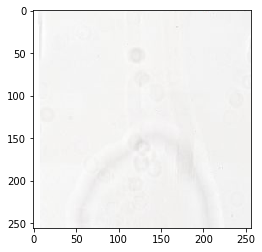

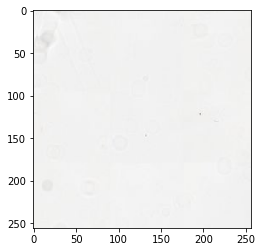

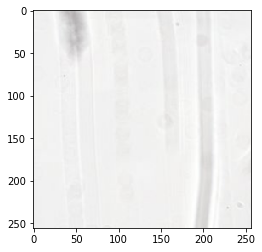

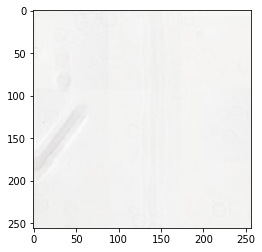

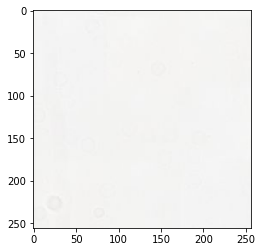

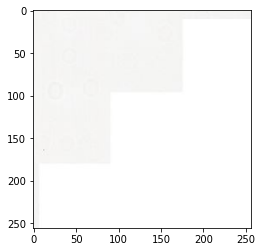

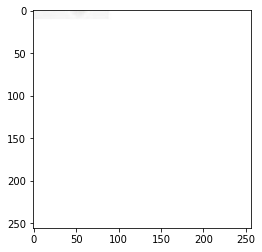

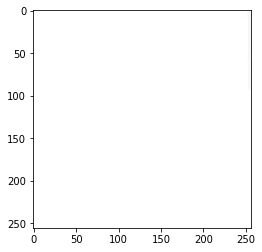

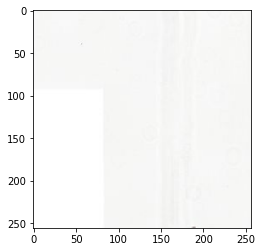

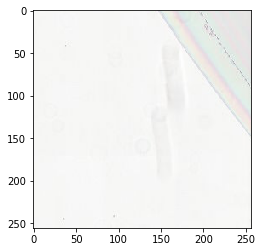

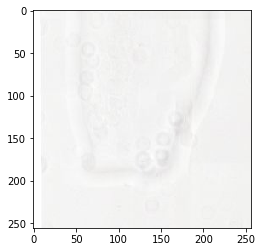

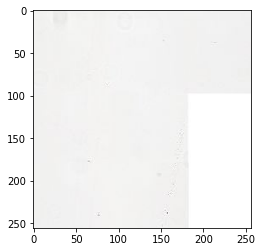

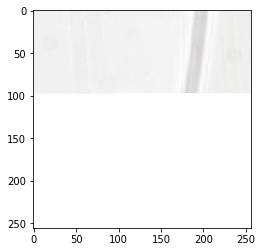

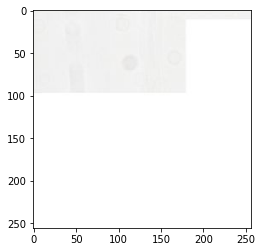

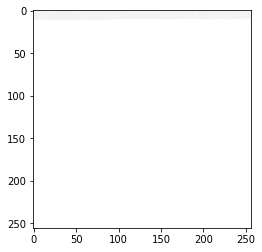

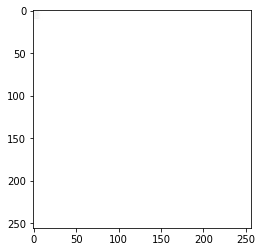

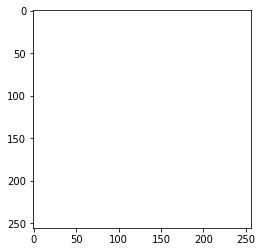

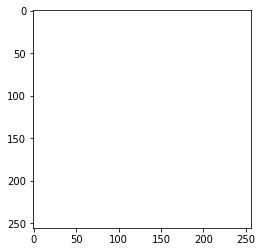

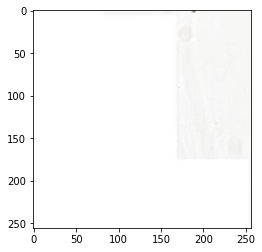

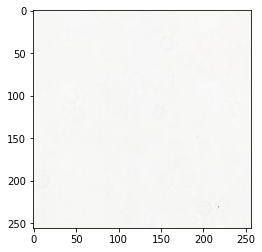

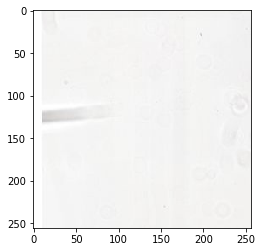

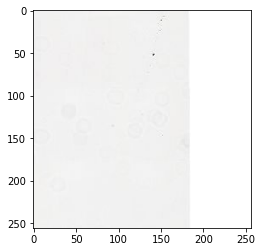

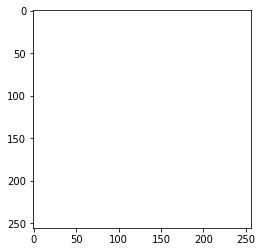

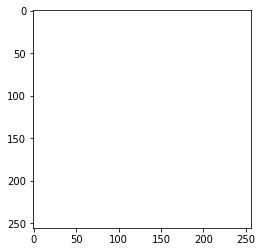

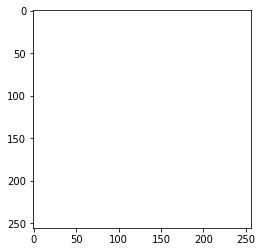

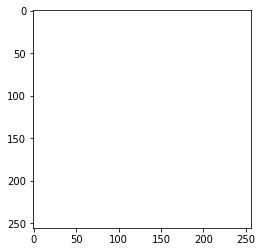

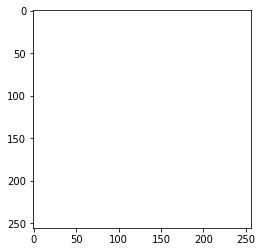

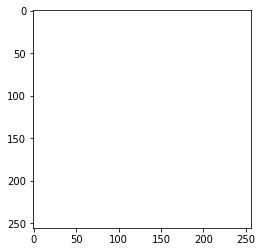

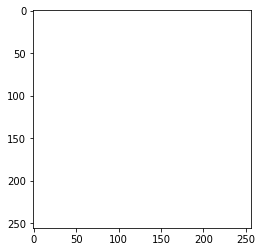

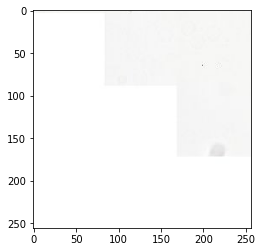

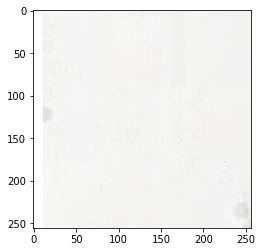

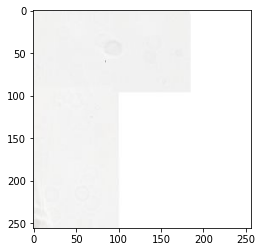

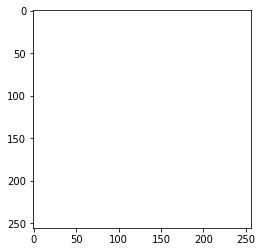

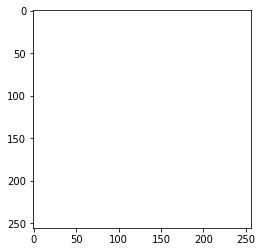

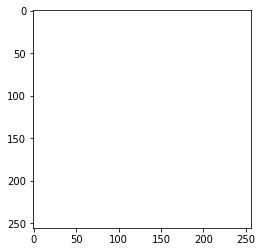

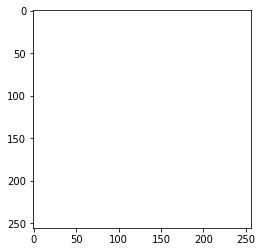

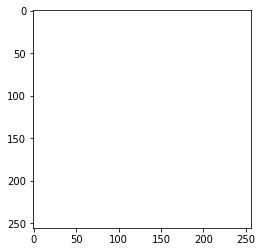

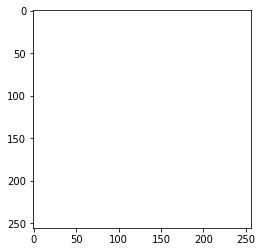

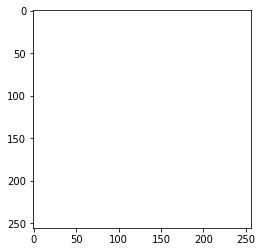

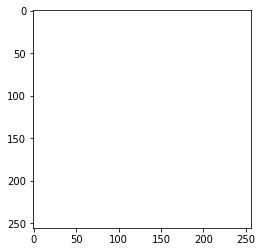

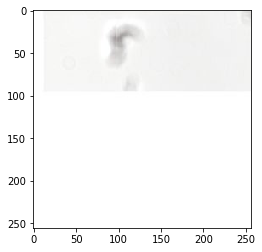

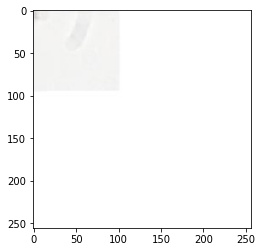

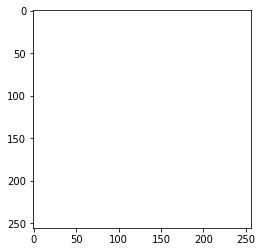

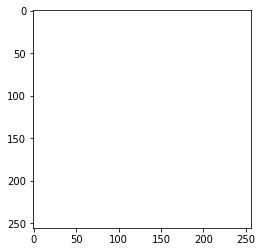

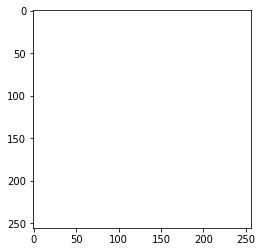

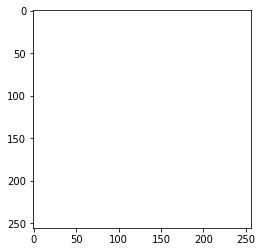

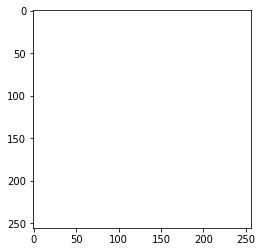

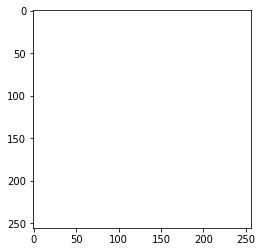

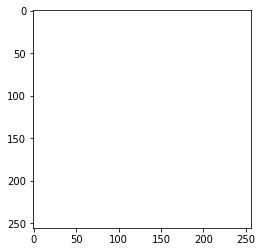

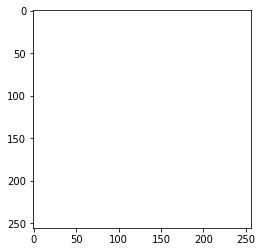

In [81]:
level = 0
ds = mr_image.getLevelDownsample(level)
for r in range(0, 10):
    for c in range(0, 10):
        image_patch = mr_image.getUCharPatch(int(256 * c * ds), int(256 * r * ds), 256, 256, level)
        plt.imshow(image_patch)
        plt.show()

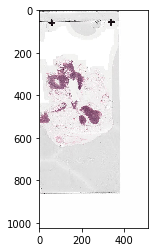

In [100]:
l = 8
dims = mr_image.getLevelDimensions(l)
img = mr_image.getUCharPatch(0, 0, dims[0], dims[1], l)
plt.imshow(img)
plt.show()

In [108]:
from skimage import filters
from skimage.color import rgb2gray

In [109]:
filters.threshold_otsu(rgb2gray(img))

0.7092268880208333

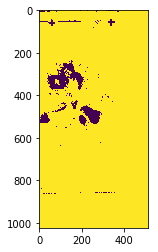

In [115]:
plt.imshow((rgb2gray(img) > 0.7092268880208333).astype(np.int16))

In [113]:
(rgb2gray(img) > 0.7092268880208333).shape

(1024, 512)

In [116]:
x = np.array([1,2,3])

In [118]:
x[[True, False, True]]

array([1, 3])

In [125]:
annotation_list = mir.AnnotationList()
xml_repository = mir.XmlRepository(annotation_list)
xml_repository.setSource('../inputs/tumor_001.xml')
xml_repository.load()
annotation_mask = mir.AnnotationToMask()
camelyon17_type_mask = True
label_map = {'metastases': 1, 'normal': 2} if camelyon17_type_mask else {'_0': 1, '_1': 1, '_2': 0}
conversion_order = ['metastases', 'normal'] if camelyon17_type_mask else  ['_0', '_1', '_2']
annotation_mask.convert(annotation_list, '../inputs/mask_001.tif', mr_image.getDimensions(), mr_image.getSpacing(), label_map, conversion_order)